In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten,  MaxPooling2D, Conv2D
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)) )
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())          
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
tensor_board = TensorBoard('./logs/LeNet-MNIST-1')
import os
from keras.callbacks import ModelCheckpoint
#Directory in which to create models 
save_direc = os.path.join(os.getcwd(), 'mnistsavedmodels') 
#Name of model files
model_name = 'mnistmodel.{epoch:03d}.h5' 
#Create Directory if it doesn't exist 
if not os.path.isdir(save_direc): 
    os.makedirs(save_direc) 
#Join the directory with the model file 
modelpath = os.path.join(save_direc, model_name) 
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_acc', verbose=1, save_best_only=True, period=1) 


In [8]:
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,
          validation_data=(X_test,y_test), callbacks=[tensor_board])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 229us/step - loss: 0.2289 - acc: 0.9301 - val_loss: 0.0491 - val_acc: 0.9838
Epoch 2/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0689 - acc: 0.9802 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 3/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0454 - acc: 0.9863 - val_loss: 0.0369 - val_acc: 0.9886
Epoch 4/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0354 - acc: 0.9896 - val_loss: 0.0291 - val_acc: 0.9913
Epoch 5/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0279 - acc: 0.9915 - val_loss: 0.0408 - val_acc: 0.9855
Epoch 6/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0243 - acc: 0.9928 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 7/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0199 - acc: 0.9939 - val_loss: 0.0299 - val_a

In [9]:
#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

10000/10000 [==============================] - 1s 117us/step
Accuracy:  0.9915


76 th image


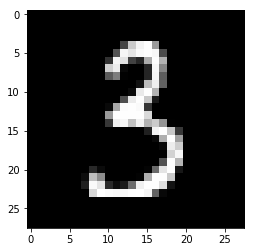

Class:  3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
#checking a random image to see the result
import random
z=random.randint(1,100)
def visualise_digits(arr_x,z):
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    print(z,"th image")
    plt.imshow(arr_x[z].reshape((28,28)),cmap=cm.Greys_r)
    plt.show()
visualise_digits(X_test,z)
img_class = model.predict_classes(X_test) 
classname = img_class[z] 
print("Class: ",classname)
print(y_test[z])

In [12]:
model.save("mnistmodel.h5")